# Complement To Principal Component Analysis made during Crowdprocess Meetup
#### In this notebook, I try to give an overview of my own understanding of PCA. I believe that the Part II, on how to interpret the final values of the principal component may help to better understand how to use it in a real life situation

PART I - PCA
- Normalizing the data
- Performing the PCA
    - Fit/Transform
    - Explained Variance Visualization
    
Part II - Interpretation
- What information was captured in the first Principal Components? 
    - First PC analysis
    - First and Second PC analysis
- Interpretation and assumption validation

Conclusion

# Imports

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("whitegrid")

from sklearn.decomposition import PCA

# getting the dataset

In [2]:
from sklearn import datasets

In [3]:
iris = datasets.load_iris()

In [7]:
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [9]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [10]:
data['target'].value_counts()

2.0    50
1.0    50
0.0    50
Name: target, dtype: int64

# Normalizing the data

### Fit

In [98]:
from sklearn.preprocessing import StandardScaler
iris = StandardScaler().fit_transform(data)

In [101]:
target = data['target']

### Transform

In [103]:
std = pd.DataFrame(StandardScaler().fit_transform(data.drop('target', axis=1)))

# the target was dropped here because our goal is feature reduction.

In [104]:
std.head()

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [105]:
# putting back the headers
std.columns = ['sepal length', 'sepal width', 'petal length', 'petal width']

In [106]:
std.head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


# Performing the PCA

In [107]:
pca = PCA(n_components=4)

### Fit

In [109]:
pca.fit(std)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

### Transform

In [29]:
princ_comp = pd.DataFrame(pca.transform(std))
princ_comp.head()

,0,1,2,3
0,-2.264542,0.505704,-0.121943,-0.023073
1,-2.086426,-0.655405,-0.227251,-0.103208
2,-2.367950,-0.318477,0.051480,-0.027825
3,-2.304197,-0.575368,0.098860,0.066311
4,-2.388777,0.674767,0.021428,0.037397


In [117]:
princ_comp.shape

(150, 4)

### Explained Variance

In [111]:
pca.explained_variance_ratio_

array([ 0.72770452,  0.23030523,  0.03683832,  0.00515193])

The first principal component captured 72 % of the variance of the original variables. 

With the first 3 principal component, we would be able to capture almost all the original data variations.

#####  visualisation

In [115]:
# creating a dataframe with the explained variances
exp_var = pd.DataFrame(pca.explained_variance_ratio_)

# Indicating to which PC each one corresponds to
exp_var['PC'] = ['PC_1', 'PC_2', 'PC_3', 'PC_4']

# setting the given PC as an index
exp_var = exp_var.set_index('PC')

# creating a cummulative explain variance variable 
exp_var['cum_var'] = exp_var[0].cumsum()

exp_var

,0,cum_var
PC,,
PC_1,0.727705,0.727705
PC_2,0.230305,0.958010
PC_3,0.036838,0.994848
PC_4,0.005152,1.000000


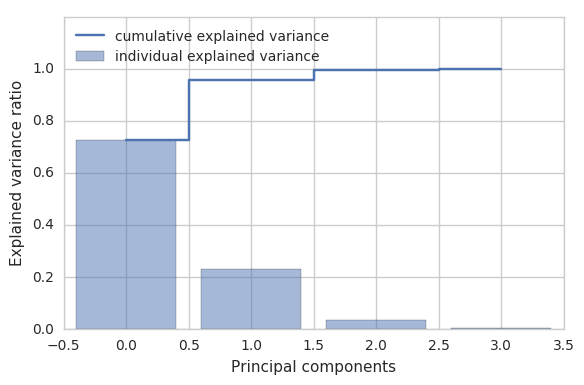

In [116]:
import numpy, scipy, pylab, random

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    
    # Explained variance histograms
    plt.bar(range(4), exp_var[0], alpha=0.5, align='center',
            label='individual explained variance')
    # Cummulative explained variance visualisation
    plt.step(range(4), exp_var['cum_var'], where='mid',
             label='cumulative explained variance')
    
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    pylab.ylim([0,1.2])
    plt.legend(loc='best')
    plt.tight_layout()

# What information was captured in the first Principal Component? 

We want to understand what actually represent the values of the firt PC and what information it can give us about the datas. 

For this, we will: 
- store the correlation of each original variable with the given PC.
- Study those correlation by using them as coordinates in a scatterplot


In [120]:
# lets create a dataframe
final = pd.DataFrame()

# lets store each variable 
final['variable'] = std.columns

In [121]:
final.head()

,variable
0,sepal length
1,sepal width
2,petal length
3,petal width


In [125]:
# we will first store the correlation here 
princ_1 = []

In [126]:
# lets compute the correlation of each original variable with the PC 1:

for i in std.columns:
    princ_1.append(princ_comp[0].corr(std[i]))

In [127]:
# insert it in the previously created dataset
final['component_1'] = princ_1

In [128]:
final

,variable,component_1
0,sepal length,0.891224
1,sepal width,-0.449313
2,petal length,0.991684
3,petal width,0.964996


In [132]:
# Lets do the same for the second PC
princ_2 = []

for i in std.columns:
    princ_2.append(princ_comp[1].corr(std[i]))

final['component_2'] = princ_2

In [134]:
final

,variable,component_1,component_2
0,sepal length,0.891224,0.357352
1,sepal width,-0.449313,0.888351
2,petal length,0.991684,0.020247
3,petal width,0.964996,0.062786


In [210]:
final['plot'] = [0,0,0,0]

# first component analysis

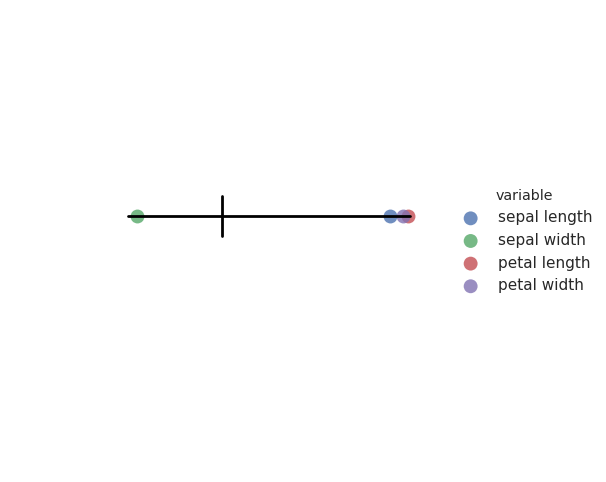

In [224]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")


sns.lmplot('component_1', 'plot',
           data=final,
           fit_reg=False,
           hue="variable",  
           scatter_kws={"marker": "D",
                        "s": 100})
plt.xlabel('PC 1')
plt.plot([-0.5, 1], [0, 0], linewidth=2, color='black')
plt.plot([0, 0], [-0.001, 0.001], linewidth=2, color='black')
plt.axis('off')
plt.show()

### the first principal component is telling us that there is a strong opposition between sepal width variables and the 3 others
- It basically means that they have some sort of opposite behaviour or distribution
- the 3 others are most likely correlated one at each others

# first and second components analysis

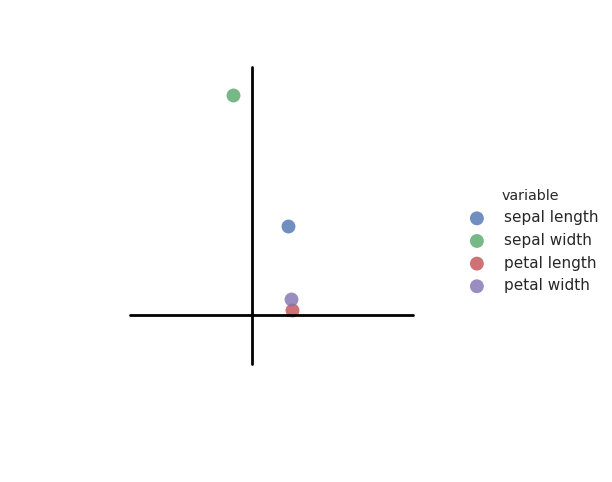

In [225]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")


sns.lmplot('component_1', 'component_2',
           data=final,
           fit_reg=False,
           hue="variable",  
           scatter_kws={"marker": "D",
                        "s": 100})
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.plot([-3, 4], [0, 0], linewidth=2, color='black')
plt.axis('off')
plt.plot([0, 0], [-0.2, 1], linewidth=2, color='black')
plt.show()

## Interpretation

1) Sepal length, petal width and petal length seems to be moving in the same direction
    - They are probably correlated
2) the first principal component is putting those 3 variable in opposition with the sepal width variable. 
    - they probably have a low correlation with that variable 
    
The first principal component is basically capturing this piece of information 

Lets verify those hypothesis

3) the second principal component seems to be capturing the same information in a smoother way
    - It seems like it is the only information  in the dataset
    - with more features, a PCA would capture this kind of relationships and oppositions for different sets of features for each component. 

In [51]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


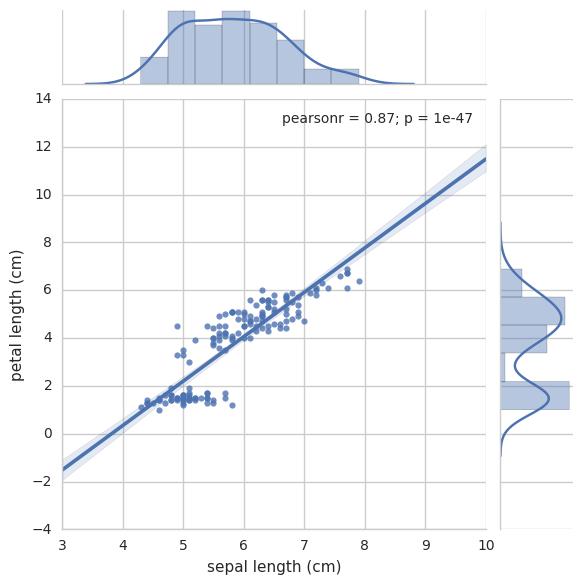

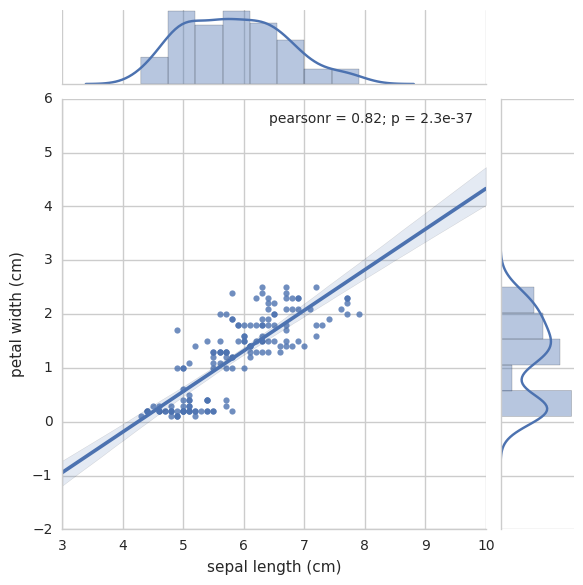

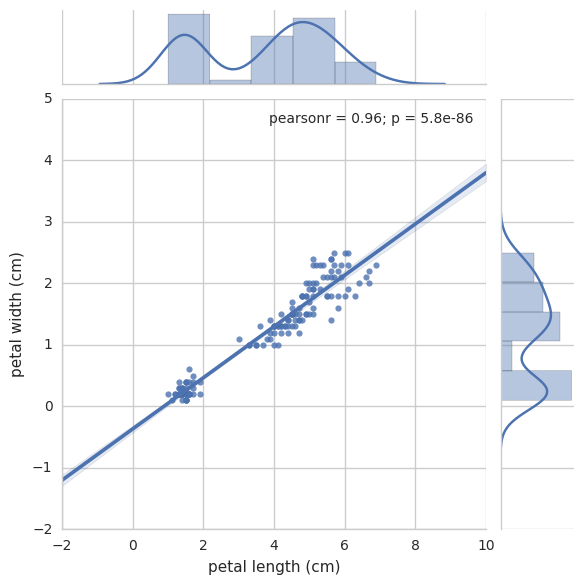

In [59]:
# assumption 1: lets confirm that Sepal length, petal width and petal length are somehow correlated (original data)

sns.jointplot(x='sepal length (cm)', y="petal length (cm)", data=data, kind="reg");
sns.jointplot(x='sepal length (cm)', y="petal width (cm)", data=data, kind="reg");
sns.jointplot(x='petal length (cm)', y="petal width (cm)", data=data, kind="reg");

As we saw, petal length and petal width were the 2 closest coordinates and as we can see, they are the 2 variables with the highest correlation ratio. 

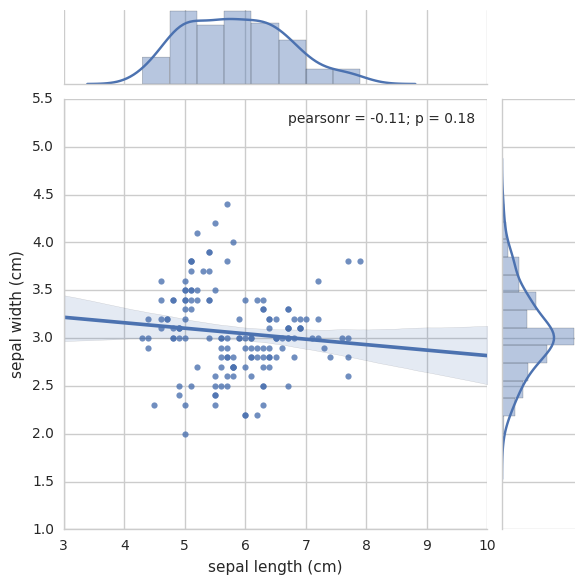

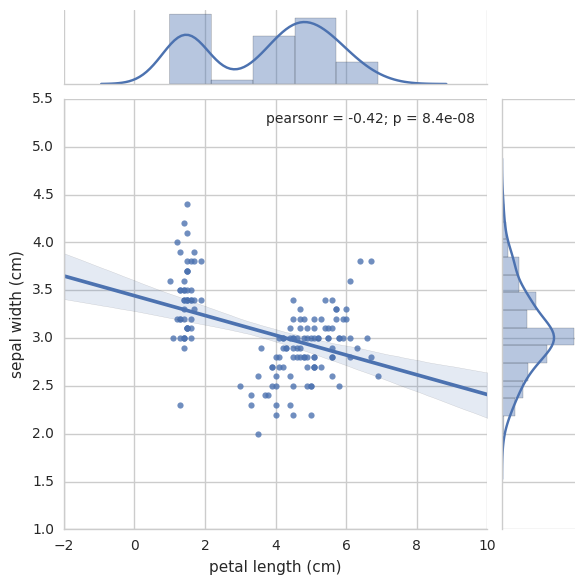

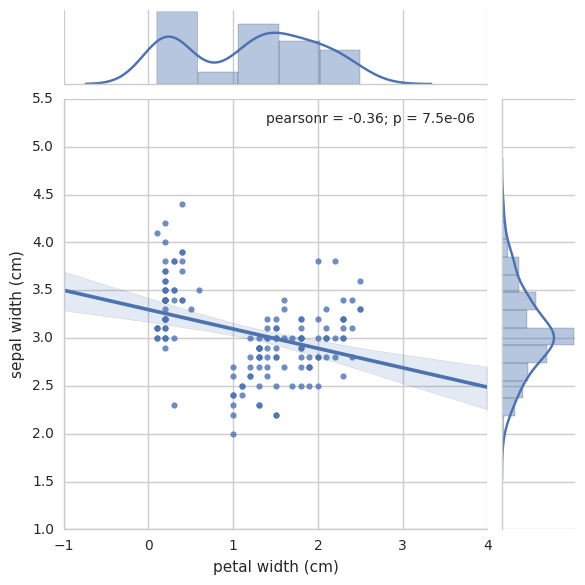

In [60]:
# assumption 2: lets confirm that Sepal length, petal width and petal length are somehow opposed to sepal width 

var = ['sepal length (cm)', 'petal length (cm)', 'petal width (cm)']

for i in var:
    sns.jointplot(x=i, y='sepal width (cm)', data=data, kind="reg");

# conclusion:

- feature reduction:
    - by removing all the original variable and keeping the 2 fist principal component, we would still explain more than 90 % of the variation of the original data. 
    - the fact that 3 of the original variable are correlated is somehow, captured in the principal component. 
    - The opposition of these 3 variable with the last one is also, somehow, captured in those 2 PC. 
    
Even if we don't use the PC variables in the end, we can reduce the number of feature by removing one of the 2 highest correlated ones. 
They are basically giving the same information and they have the same opposition with other variable. 
    